# MNIST 손글씨 숫자 예측


### 다음과 같은 ANN 을 만든다

이미지파일(28X28픽셀)이 입력으로 들어오면, 아웃풋으로는 0~9 까지의 10개 숫자로 분류하는 인공지능!

사진은 2차원 데이터이므로, 우리는 ANN의 입력에, 사진의 픽셀값을 flattening 하여 입력을 줄 것이다.

따라서 입력레이어는 784개, 히든1은 512, 히든2는 512, 아웃풋은 10개의 신경망 구축. 

![pastedImage0.png](attachment:pastedImage0.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

In [ ]:
# MNist 데이터를 가져온다. 이미 7만장의 손글씨 이미지 데이터가 있다. 

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# 데이터 모양 확인

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# 이미지 데이터 1개를 가져와서, 화면에 찍어보자.

In [ ]:
X_train[0]

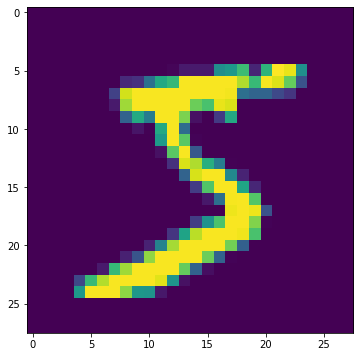

In [134]:
plt.figure(figsize=(8, 6))
plt.imshow(X_train[0] )
plt.show()

In [ ]:
# 이미지는 가로, 세로가 있고, 이 안에 숫자 0~255까지 숫자로 채워진 데이터다.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 실제 이미지 파일을 표시.

In [136]:
img = Image.fromarray(X_train[0])

In [137]:
img
# 실제로는 엄청 작은 파일;;

In [ ]:
# 1. 데이터를 딥러닝으로 처리하기 위해서, 행렬로 만들면서, 가로세로 값을 일렬로 만든다.

In [99]:
X_train = X_train.reshape(-1, 28 * 28)

In [100]:
X_test = X_test.reshape(-1, 28 * 28)

In [ ]:
# 2. 데이터를 딥러닝에서 처리할 수 있도록 float로 바꿔준다.

In [ ]:
X_train.dtype

dtype('uint8')

In [101]:
X_train = X_train.astype(float)

In [102]:
X_test = X_test.astype(float)

In [142]:
X_test.dtype

dtype('float64')

In [ ]:
# 3. 이미지라서, 숫자가 0~255 이므로, 0~1 사이로 정규화 시켜주자.

In [103]:
#참고: 0.0으로 나누면 자동 float로 변환 된다
X_train = X_train / 255.0  

In [104]:
X_test = X_test / 255.0

In [ ]:
# 4. 분류의 문제이므로, y값을 확인하여, 카테고리컬 데이터를 원핫인코딩값으로 바꾼다.

In [145]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

카테고리컬로 바꾸기

In [105]:
# 3개이상의 카테고리컬 데이터
y_train = np_utils.to_categorical(y_train, 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [106]:
y_test = np_utils.to_categorical(y_test, 10)

In [125]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 5. 모델 만들기

In [ ]:
# 이미지파일(28X28픽셀)이 입력으로 들어오면, 아웃풋으로는 0~9 까지의 10개 숫자로 분류하는 인공지능!

# 사진은 2차원 데이터이므로, 우리는 ANN의 입력에, 사진의 픽셀값을 flattening 하여 입력을 줄 것이다.

# 따라서 입력레이어는 784개, 히든1은 512, 히든2는 512, 아웃풋은 10개의 신경망 구축. 

In [12]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [146]:
model = Sequential()

In [147]:
# model.add( Flatten() )
# 자동으로 

In [148]:
#units 는 첫번째 hidden layer의 노드가 512이고 입력은 784개가 들어온다
# input_dim 을 하면 지정하면 최초 입력 데이터를 지정할 수 있음, 수동으로 하는 방법
# 처음에 model.add(Flastten())을 사용하면 자동으로 2차원을 하나로 만들어서 넣어줘서 input_dim을 지정할 필요가 없다 (input_shape 와 같음)
model.add ( Dense( input_dim = 784 , units=512, activation='relu') )

In [149]:
model.add ( Dense( units=512, activation='relu') )

In [150]:
model.add ( Dense( units=512, activation='relu') )

In [151]:
# 카테고리컬 데이터로 y를 원 핫인코딩을 했기 때문에 sigmoid를 사용해야 함
model.add ( Dense( units=10, activation='sigmoid') )

In [ ]:
# 5. 컴파일

In [92]:
# 3개 이상의 분류일 때 y가 정수 일 때는 loss함수는 sparse_categorical_crossentropy로 한다
# model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [152]:
# 3개 이상의 카테고리컬 데이터로 One Hot Encoding이 되었을 때는
# 오차함수를 지정할 때는 categorical_crossentropy로 해야한다
##### sigmoid 를 사용하려면 lost= 'categorical_crossentropy'로 해야한다
# 버그 주의
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 6. 학습 

In [153]:
model_hist = model.fit(X_train, y_train, epochs=50, batch_size=20, callbacks=[ myCallback_fn ], verbose=1)

Epoch 1/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.3156 - accuracy: 0.9017
Epoch 2/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.1045 - accuracy: 0.9691
Epoch 3/50
3000/3000 [==============================] - 21s 7ms/step - loss: 0.0712 - accuracy: 0.9795
Epoch 4/50
3000/3000 [==============================] - 21s 7ms/step - loss: 0.0551 - accuracy: 0.9843
Epoch 5/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 6/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 7/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 8/50
3000/3000 [==============================] - 21s 7ms/step - loss: 0.0357 - accuracy: 0.9902
Epoch 9/50
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0258 - accuracy: 0.9926
Epoch 10/50
3000/3000 [==============================] - 21s 7ms/step - l

In [135]:

class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.997):
           print("\n정확도 0.995 이상이면 학습을 멈춥니다.")  
           self.model.stop_training = True


In [136]:
myCallback_fn = myCallback()

In [123]:
np.argmax( y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred = model.predict(np.argmax( y_test, axis=1))

In [ ]:
# 7. 모델 평가.

In [154]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1486 - accuracy: 0.9816


[0.14859721064567566, 0.9815999865531921]

### 선형대수학 참고 동영상

https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab